Data used in this example can be downloaded from kaggle: https://www.kaggle.com/c/boston-housing

For myself, I have temporarily saved it into /Users/jvsingh/.kaggle/competitions/boston-housing using the kaggle api.

## Ridge Regression

In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

import numpy as np
import pandas as pd

In [2]:
filename="/Users/jvsingh/.kaggle/competitions/boston-housing/train.csv"

In [3]:
dataframe = read_csv(filename)
dataframe.columns = [x.upper() for x in dataframe.columns]
dataframe.head()

,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
#we do not need ID
dataframe = dataframe.drop(['ID'], axis=1)
print(dataframe.shape)
dataframe.head()

(333, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
X = dataframe.values[:,0:-1]
Y = dataframe.values[:,-1]
print("X:", X)
print("Y:",Y)

X: [[  6.32000000e-03   1.80000000e+01   2.31000000e+00 ...,   1.53000000e+01
    3.96900000e+02   4.98000000e+00]
 [  2.73100000e-02   0.00000000e+00   7.07000000e+00 ...,   1.78000000e+01
    3.96900000e+02   9.14000000e+00]
 [  3.23700000e-02   0.00000000e+00   2.18000000e+00 ...,   1.87000000e+01
    3.94630000e+02   2.94000000e+00]
 ..., 
 [  4.52700000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   9.08000000e+00]
 [  6.07600000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   5.64000000e+00]
 [  4.74100000e-02   0.00000000e+00   1.19300000e+01 ...,   2.10000000e+01
    3.96900000e+02   7.88000000e+00]]
Y: [ 24.   21.6  33.4  36.2  22.9  15.   18.9  21.7  20.4  18.2  19.9  23.1
  20.2  13.6  19.6  15.2  14.5  14.8  12.7  14.5  13.5  24.7  30.8  34.9
  25.3  24.7  21.2  19.3  20.   16.6  19.4  19.7  20.5  23.4  18.9  35.4
  24.7  31.6  23.3  18.7  16.   25.   33.   23.5  19.4  22.   17.4  24.2
  22.8  23.4  24.1  21

In [6]:
model_ridge = Ridge(alpha=0.1, random_state=0)

In [7]:
model_ridge.fit(X, Y) 
print("Coefficients:", model_ridge.coef_)
print("Model Intercept:", model_ridge.intercept_)

Coefficients: [ -5.14275441e-02   4.77340132e-02   4.83844881e-02   3.75224190e+00
  -1.42937029e+01   3.77476435e+00  -5.89921209e-03  -1.52738682e+00
   3.24907138e-01  -1.29661653e-02  -8.40697761e-01   1.17559549e-02
  -6.02684069e-01]
Model Intercept: 33.0439261504


In [8]:
predictions = model_ridge.predict(X=X)
predictions[0:10]

array([ 29.80082255,  24.57147255,  28.73006224,  27.82733347,
        22.30765281,  17.44444252,  20.69015373,  20.13653518,
        19.96883598,  19.36071006])

In [9]:
#You can also do the same predictions manually using the 
#bias term and the calculated coefficients
bias_and_X = np.hstack([np.ones((X.shape[0],1)), X])
thetas     = np.concatenate((model_ridge.intercept_.reshape(-1,1), 
                             model_ridge.coef_.reshape(-1,1)))
predvals   = np.matmul(bias_and_X, thetas)
predvals[0:10]

array([[ 29.80082255],
       [ 24.57147255],
       [ 28.73006224],
       [ 27.82733347],
       [ 22.30765281],
       [ 17.44444252],
       [ 20.69015373],
       [ 20.13653518],
       [ 19.96883598],
       [ 19.36071006]])

In [10]:
#These predicted values must be same
assert(sum([np.round(np.abs(p1-p2),10) for p1,p2 in zip(predictions, predvals)]) == 0.0 )

In [11]:
#Let us analyze errors
errors = Y - predictions

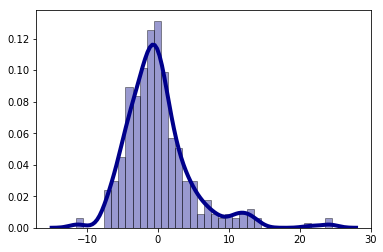

In [12]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# Density Plot and Histogram
sns.distplot(errors, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [13]:
import scipy
from scipy import stats
k2, p = stats.normaltest(errors)
alpha = 0.025
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 3.60027e-28
The null hypothesis can be rejected


Errors are not normally distributed - possibly regularization plays a role. Let us make alpha=0, it should be normal

Coefficients: [ -5.24893379e-02   4.74448677e-02   5.38552422e-02   3.78486439e+00
  -1.57396571e+01   3.76883175e+00  -4.62660241e-03  -1.54882312e+00
   3.28967093e-01  -1.28664959e-02  -8.56975746e-01   1.16659048e-02
  -6.00315456e-01]
Model Intercept: 34.0454377635


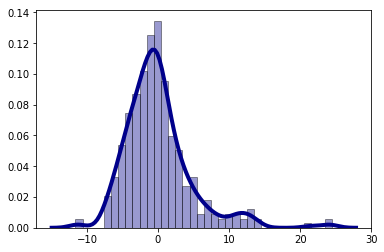

In [14]:
model_ridge = Ridge(alpha=0, random_state=0)
model_ridge.fit(X, Y) 
print("Coefficients:", model_ridge.coef_)
print("Model Intercept:", model_ridge.intercept_)
predictions = model_ridge.predict(X=X)

errors = Y - predictions

%matplotlib inline
# Density Plot and Histogram
sns.distplot(errors, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


In [15]:
#Let us produce ridge coefficients with different alphas
#logalphas = np.linspace()
logalphas = np.linspace(start = -10, stop=+20, num=50, dtype=np.float32)
print(logalphas)
alphas    = np.exp(logalphas)
print(alphas)

def RidgeCoeffs(alpha):
    model_ridge = Ridge(alpha=alpha, random_state=0)
    model_ridge.fit(X, Y) 
    thetas     = np.concatenate((model_ridge.intercept_.reshape(-1,1), 
                             model_ridge.coef_.reshape(-1,1)))
    return(thetas.flatten().tolist())

coeffsList = [RidgeCoeffs(alpha) for alpha in alphas]
coeffsDF = pd.DataFrame.from_records(coeffsList)

#prepare column names
cols = dataframe.columns[0:-1].tolist()
cols.insert(0,"bias")

coeffsDF.columns = cols

coeffsDF["logalphas"] = logalphas
coeffsDF.head()
#tt.flatten()
#?np.linspace

[-10.          -9.38775539  -8.77550983  -8.16326523  -7.55102062
  -6.93877554  -6.32653046  -5.71428585  -5.10204077  -4.48979568
  -3.87755108  -3.26530623  -2.65306115  -2.04081631  -1.42857146
  -0.81632656  -0.20408164   0.40816328   1.02040815   1.63265312
   2.24489784   2.85714293   3.46938777   4.08163261   4.6938777
   5.3061223    5.91836739   6.53061247   7.14285707   7.75510216
   8.36734676   8.97959137   9.59183693  10.20408154  10.81632614
  11.4285717   12.04081631  12.65306091  13.26530647  13.87755108
  14.48979568  15.10204124  15.71428585  16.32653046  16.93877602
  17.55101967  18.16326523  18.77551079  19.38775444  20.        ]
[  4.53999310e-05   8.37432162e-05   1.54470123e-04   2.84930517e-04
   5.25573443e-04   9.69455927e-04   1.78822735e-03   3.29850521e-03
   6.08431734e-03   1.12229362e-02   2.07014587e-02   3.81852388e-02
   7.04352707e-02   1.29922614e-01   2.39651024e-01   4.42052543e-01
   8.15395772e-01   1.50405276e+00   2.77432680e+00   5.11743402

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,logalphas
0,34.044936,-0.052489,0.047445,0.053853,3.784849,-15.738934,3.768835,-0.004627,-1.548812,0.328965,-0.012867,-0.856968,0.011666,-0.600317,-10.000000
1,34.044512,-0.052488,0.047445,0.053850,3.784836,-15.738324,3.768838,-0.004628,-1.548803,0.328963,-0.012867,-0.856961,0.011666,-0.600318,-9.387755
2,34.043730,-0.052488,0.047445,0.053846,3.784812,-15.737198,3.768842,-0.004629,-1.548787,0.328960,-0.012867,-0.856948,0.011666,-0.600319,-8.775510
3,34.042287,-0.052486,0.047446,0.053838,3.784767,-15.735123,3.768851,-0.004631,-1.548756,0.328954,-0.012867,-0.856925,0.011666,-0.600323,-8.163265
4,34.039628,-0.052483,0.047447,0.053824,3.784686,-15.731295,3.768868,-0.004634,-1.548699,0.328943,-0.012867,-0.856881,0.011666,-0.600329,-7.551021


/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


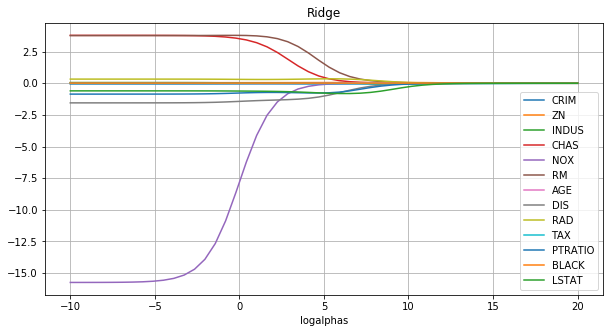

In [16]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

coeffsDF.plot(x='logalphas', 
              y=coeffsDF.columns[1:-1], 
              figsize=(10,5), 
              grid=True,
              title = "Ridge")


### LASSO Regression

In [17]:
from sklearn.linear_model import Lasso

In [18]:
#Let us produce ridge coefficients with different alphas
logalphas = np.linspace(start = -10, stop=+20, num=50, dtype=np.float32)
#print(logalphas)
alphas    = np.exp(logalphas)
#print(alphas)

def LassoCoeffs(alpha):
    model = Lasso(alpha=alpha, random_state=0)
    model.fit(X, Y) 
    thetas     = np.concatenate((model.intercept_.reshape(-1,1), 
                             model.coef_.reshape(-1,1)))
    return(thetas.flatten().tolist())

coeffsList = [LassoCoeffs(alpha) for alpha in alphas]
#import pandas as pd
coeffsDF = pd.DataFrame.from_records(coeffsList)

#prepare column names
cols = dataframe.columns[0:-1].tolist()
cols.insert(0,"bias")
coeffsDF.columns = cols

coeffsDF["logalphas"] = logalphas
coeffsDF.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,logalphas
0,34.035019,-0.052476,0.047448,0.053795,3.783935,-15.723901,3.768809,-0.004638,-1.548565,0.328924,-0.012868,-0.856802,0.011667,-0.600348,-10.000000
1,34.026220,-0.052465,0.047450,0.053745,3.783150,-15.710594,3.768790,-0.004648,-1.548347,0.328887,-0.012869,-0.856655,0.011668,-0.600376,-9.387755
2,34.009989,-0.052445,0.047455,0.053651,3.781701,-15.686048,3.768754,-0.004666,-1.547944,0.328819,-0.012870,-0.856385,0.011669,-0.600427,-8.775510
3,33.980049,-0.052408,0.047463,0.053479,3.779030,-15.640768,3.768688,-0.004700,-1.547202,0.328694,-0.012874,-0.855886,0.011672,-0.600522,-8.163265
4,33.924777,-0.052339,0.047478,0.053161,3.774103,-15.557213,3.768569,-0.004761,-1.545832,0.328462,-0.012880,-0.854964,0.011678,-0.600696,-7.551021


/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


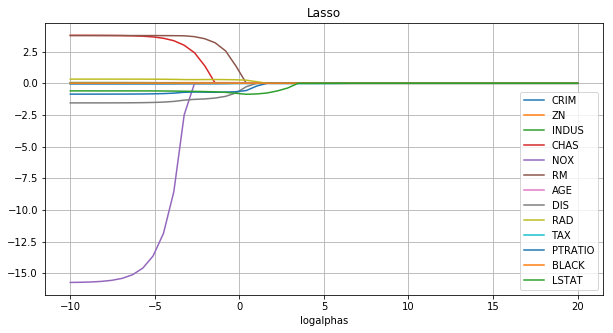

In [19]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

coeffsDF.plot(x = 'logalphas', 
              y = coeffsDF.columns[1:-1], 
              figsize=(10,5), 
              grid=True,
              title = "Lasso")

As we see above, the Lasso converges faster to zero as expected

As seen below, both **ridge** and **lasso** have same estimates and equal to that of Linear Regression if we use the regularization paramater 0, i.e **alpha=0**

In [20]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
np.concatenate((model.intercept_.reshape(-1,1), model.coef_.reshape(-1,1))).flatten()

array([  3.40454378e+01,  -5.24893379e-02,   4.74448677e-02,
         5.38552422e-02,   3.78486439e+00,  -1.57396571e+01,
         3.76883175e+00,  -4.62660241e-03,  -1.54882312e+00,
         3.28967093e-01,  -1.28664959e-02,  -8.56975746e-01,
         1.16659048e-02,  -6.00315456e-01])

In [21]:
model = Lasso(alpha=0, random_state=0)
model.fit(X, Y) 
np.concatenate((model.intercept_.reshape(-1,1), model.coef_.reshape(-1,1))).flatten()

/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/jvsingh/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([  3.40454378e+01,  -5.24893379e-02,   4.74448677e-02,
         5.38552422e-02,   3.78486439e+00,  -1.57396571e+01,
         3.76883175e+00,  -4.62660241e-03,  -1.54882312e+00,
         3.28967093e-01,  -1.28664959e-02,  -8.56975746e-01,
         1.16659048e-02,  -6.00315456e-01])

In [22]:
model = Ridge(alpha=0, random_state=0)
model.fit(X, Y) 
np.concatenate((model.intercept_.reshape(-1,1), model.coef_.reshape(-1,1))).flatten()

array([  3.40454378e+01,  -5.24893379e-02,   4.74448677e-02,
         5.38552422e-02,   3.78486439e+00,  -1.57396571e+01,
         3.76883175e+00,  -4.62660241e-03,  -1.54882312e+00,
         3.28967093e-01,  -1.28664959e-02,  -8.56975746e-01,
         1.16659048e-02,  -6.00315456e-01])